With multiple Linear regression, there are multiple independent variables (predictors)

and their associated slope coefficients

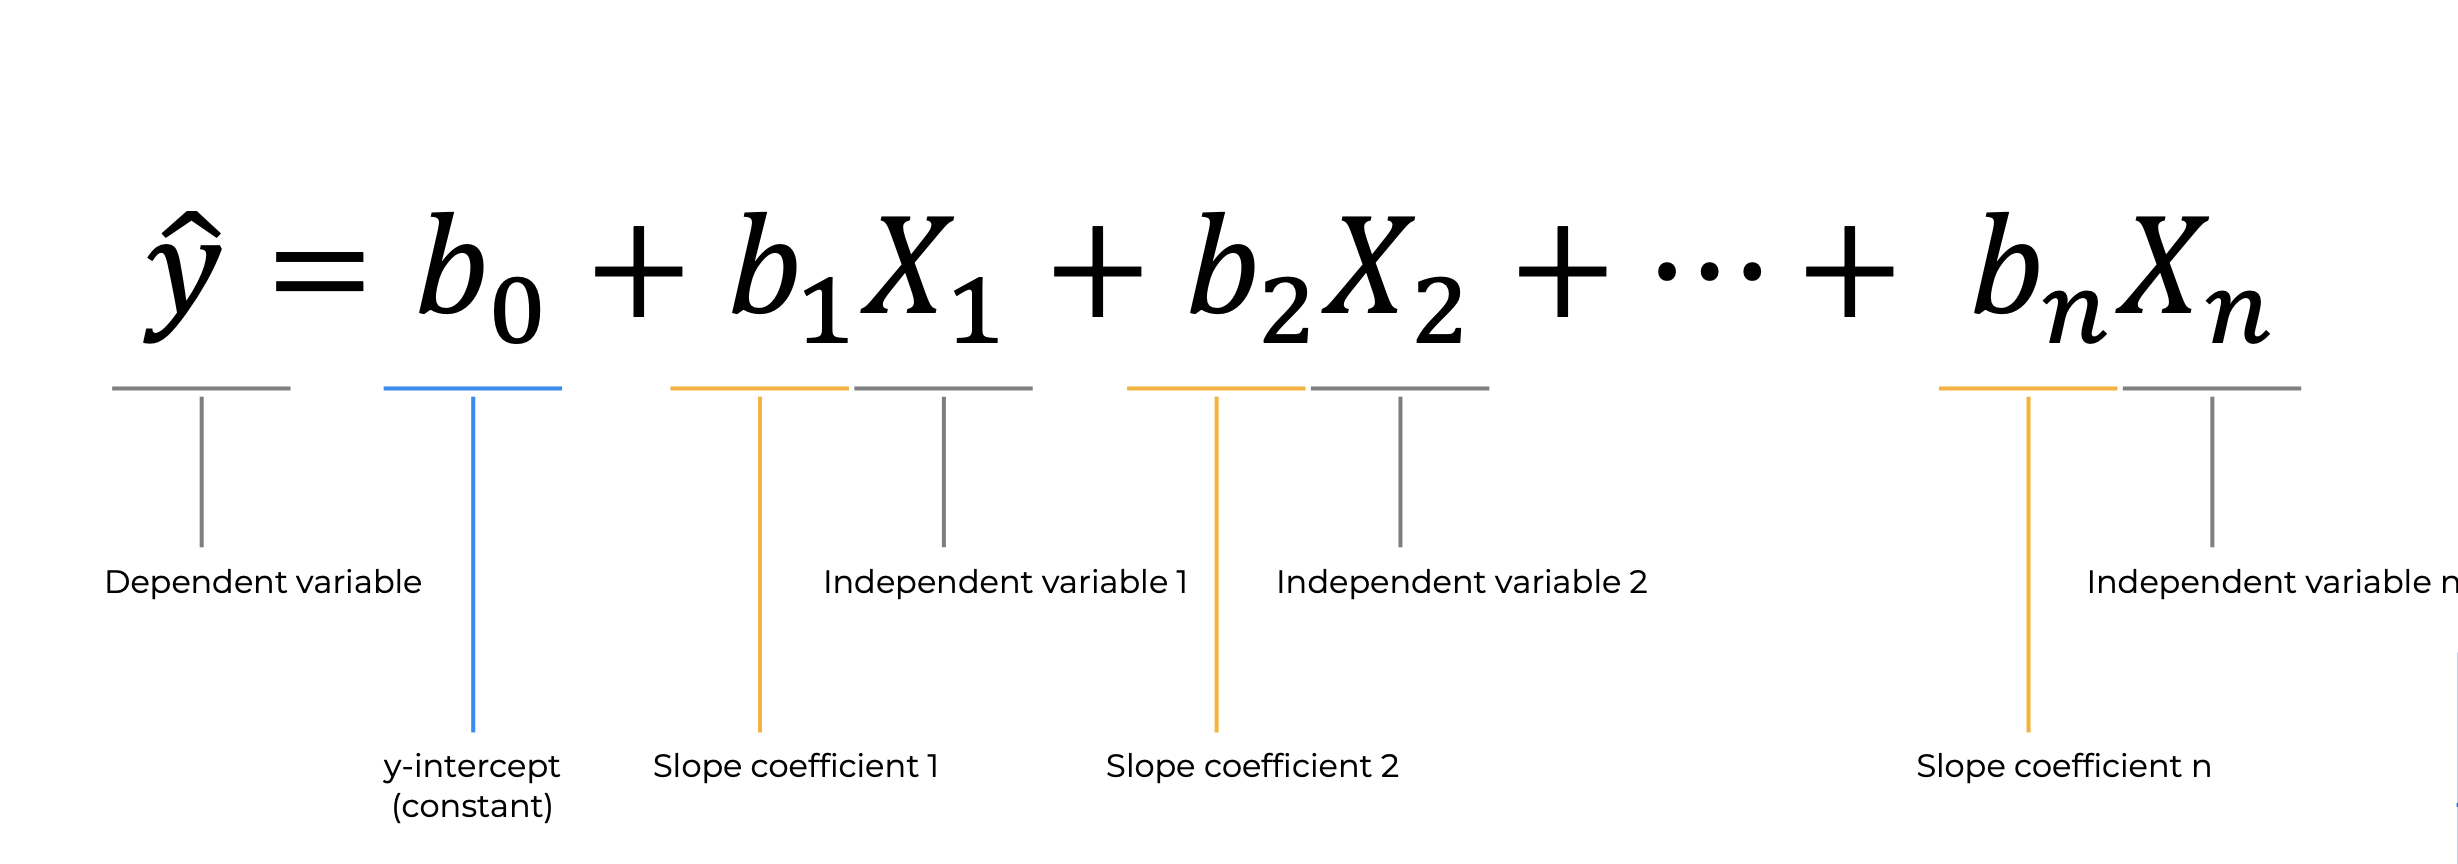

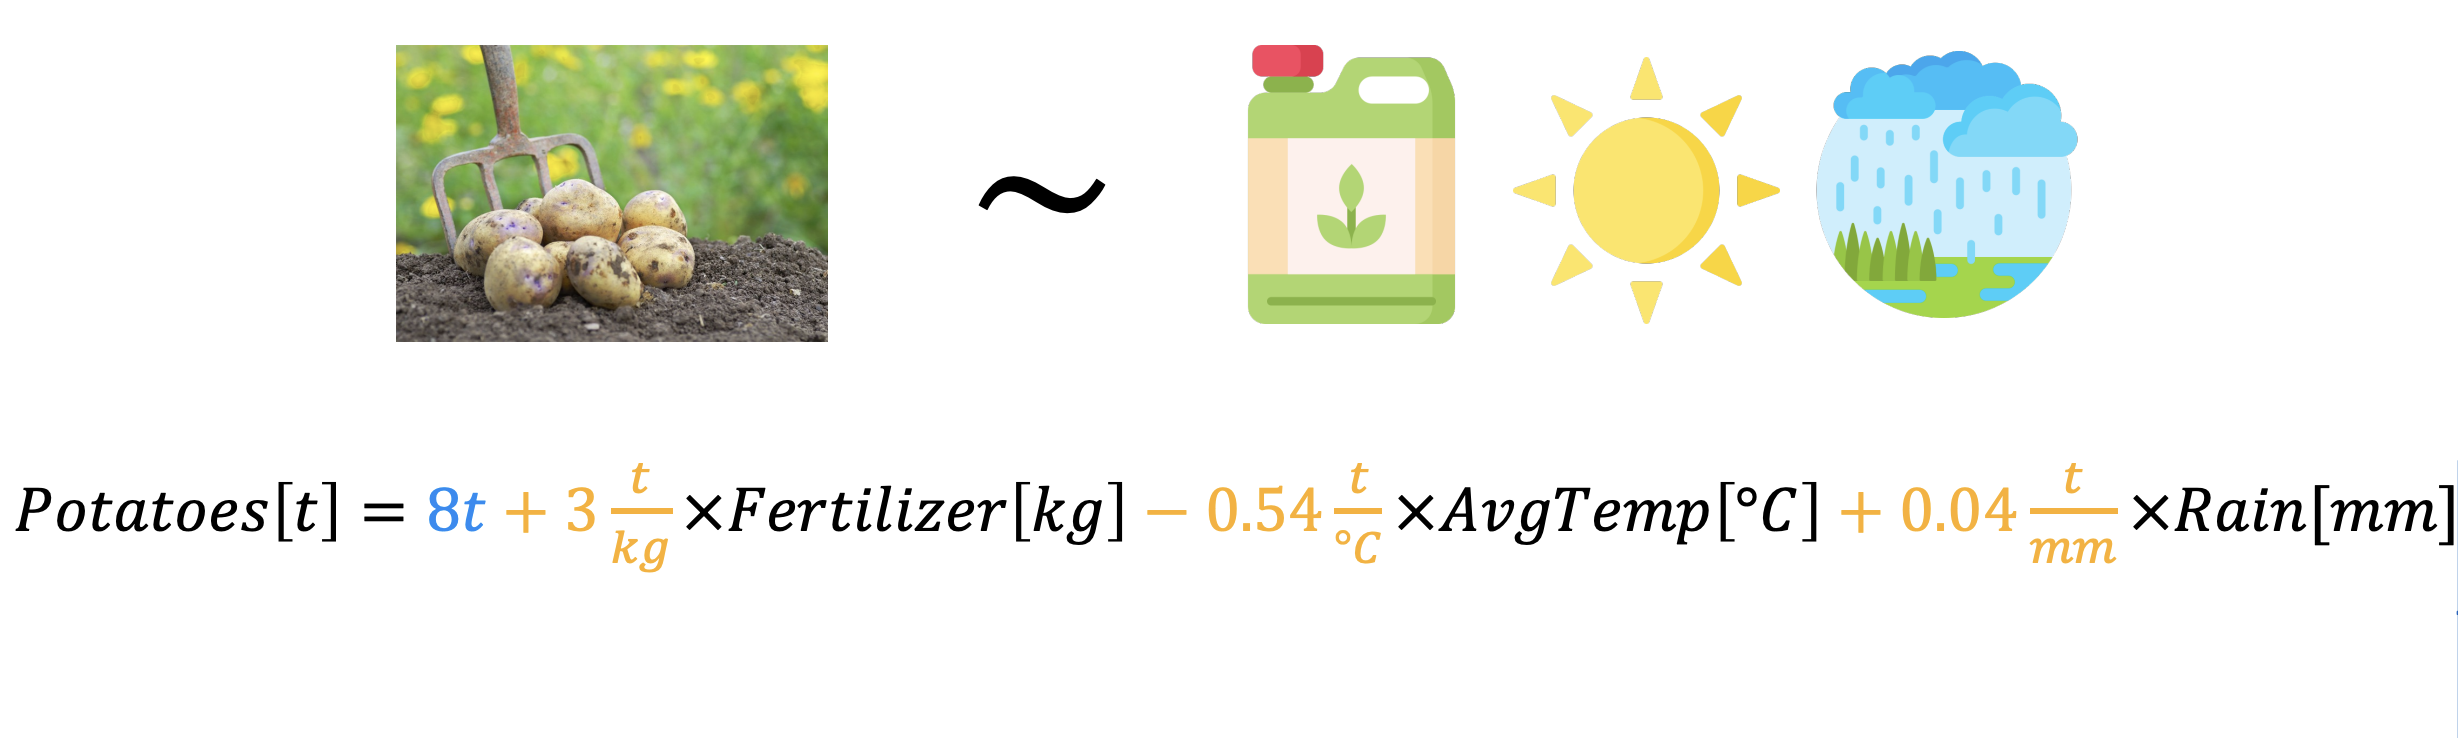


**Some Additional Reading** 
- https://www.mdpi.com/2073-4395/11/5/885

## Where is Linear regression applicable

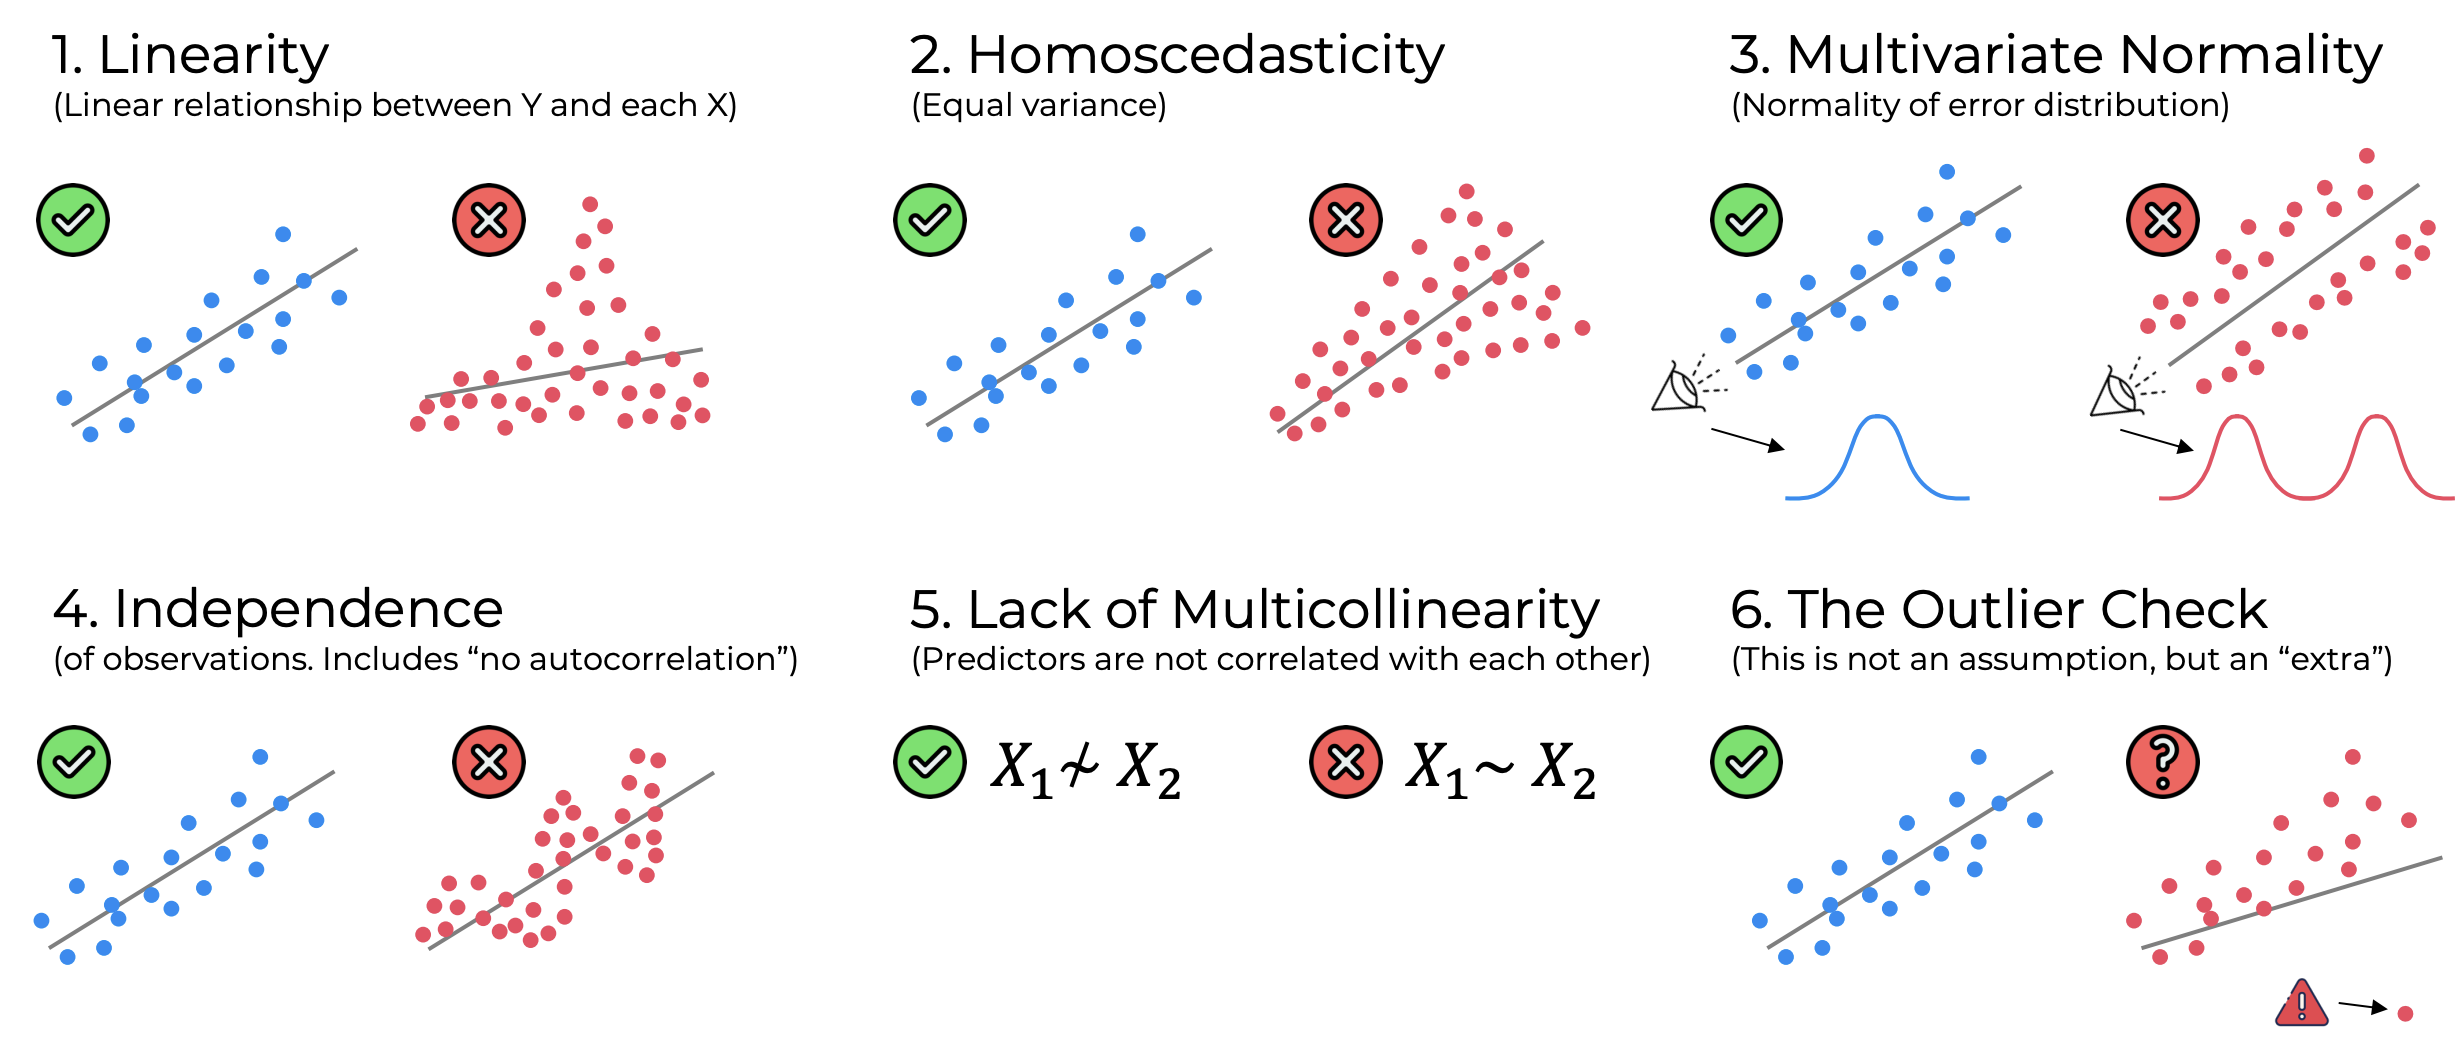

# P-Value

Relates to *Statistical Significance* ~ 5% 

Null Hypothesis



# Predicting with multiple linear regression

It is recommended to only keep the important (and right) independent variables.

5 methods of building models
  1. All in
  2. Backward Elimination
  3. Forward Selection
  4. Bi-directional Elimination
  5. Score Comparison
  
2,3 and 4 are also called Stepwise regression

##### Backward Elimination
**Step 1** Select a Statistical Significance Level (eg. SL 0.05)

**Step 2** Fit the full model with All predictors

Each Predictor will have an associated p-value

**Step 3** Consider predictor with highest p-value. If P > SL, go to step 4

**Step 4** Remove the predictor

**Step 5** Refit the model without this predictor

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('50_Startups.csv')

X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

## Encode categorical data

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder="passthrough")
X = np.array(ct.fit_transform(X))

## Split train test

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [8]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [9]:
y_pred = regressor.predict(X_test)
y_pred

array([103015.20159796, 132582.27760815, 132447.73845175,  71976.09851259,
       178537.48221056, 116161.24230166,  67851.69209676,  98791.73374687,
       113969.43533013, 167921.06569551])

In [12]:
y_test

28    103282.38
11    144259.40
10    146121.95
41     77798.83
2     191050.39
27    105008.31
38     81229.06
31     97483.56
22    110352.25
4     166187.94
Name: Profit, dtype: float64

In [13]:
y_pred.reshape(len(y_pred),1)

array([[103015.2 ],
       [132582.28],
       [132447.74],
       [ 71976.1 ],
       [178537.48],
       [116161.24],
       [ 67851.69],
       [ 98791.73],
       [113969.44],
       [167921.07]])